# AMATH 342 HW 2

<p> <b> Avinash Joshi </b> </p>
<p> <b> AMATH 342 Wi 22 </b> </p>
<p> <b> Prof. Shea-Brown </b> </p>
<p> <b> 23 January 2022 </b> </p>

In [13]:
#import needed libraries
import matplotlib.pyplot as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline 
plt.rcParams['figure.dpi']=400

import numpy as np  # That gives numerical arrays and tools for manipulating them
import scipy.io as sio #used to import data

In [14]:
#pick the amount of time, data file does to T = 1000
T = 1000 #you can change this value

#import the data from the .mat file
mat_contents = sio.loadmat('./data.mat') #make sure this has the path to correct .mat file

#save the first T seconds in arrays
stim = mat_contents['stim'][:,:,:T*60]
stim=np.array(stim)
spikeTrain = mat_contents['spikeTrain'][:T*60]
spikeTrain=np.squeeze(spikeTrain)
#move_gabor = mat_contents['move_gabor']

#save some needed variables
frame_rate = 60
time_between_samples = 1/frame_rate

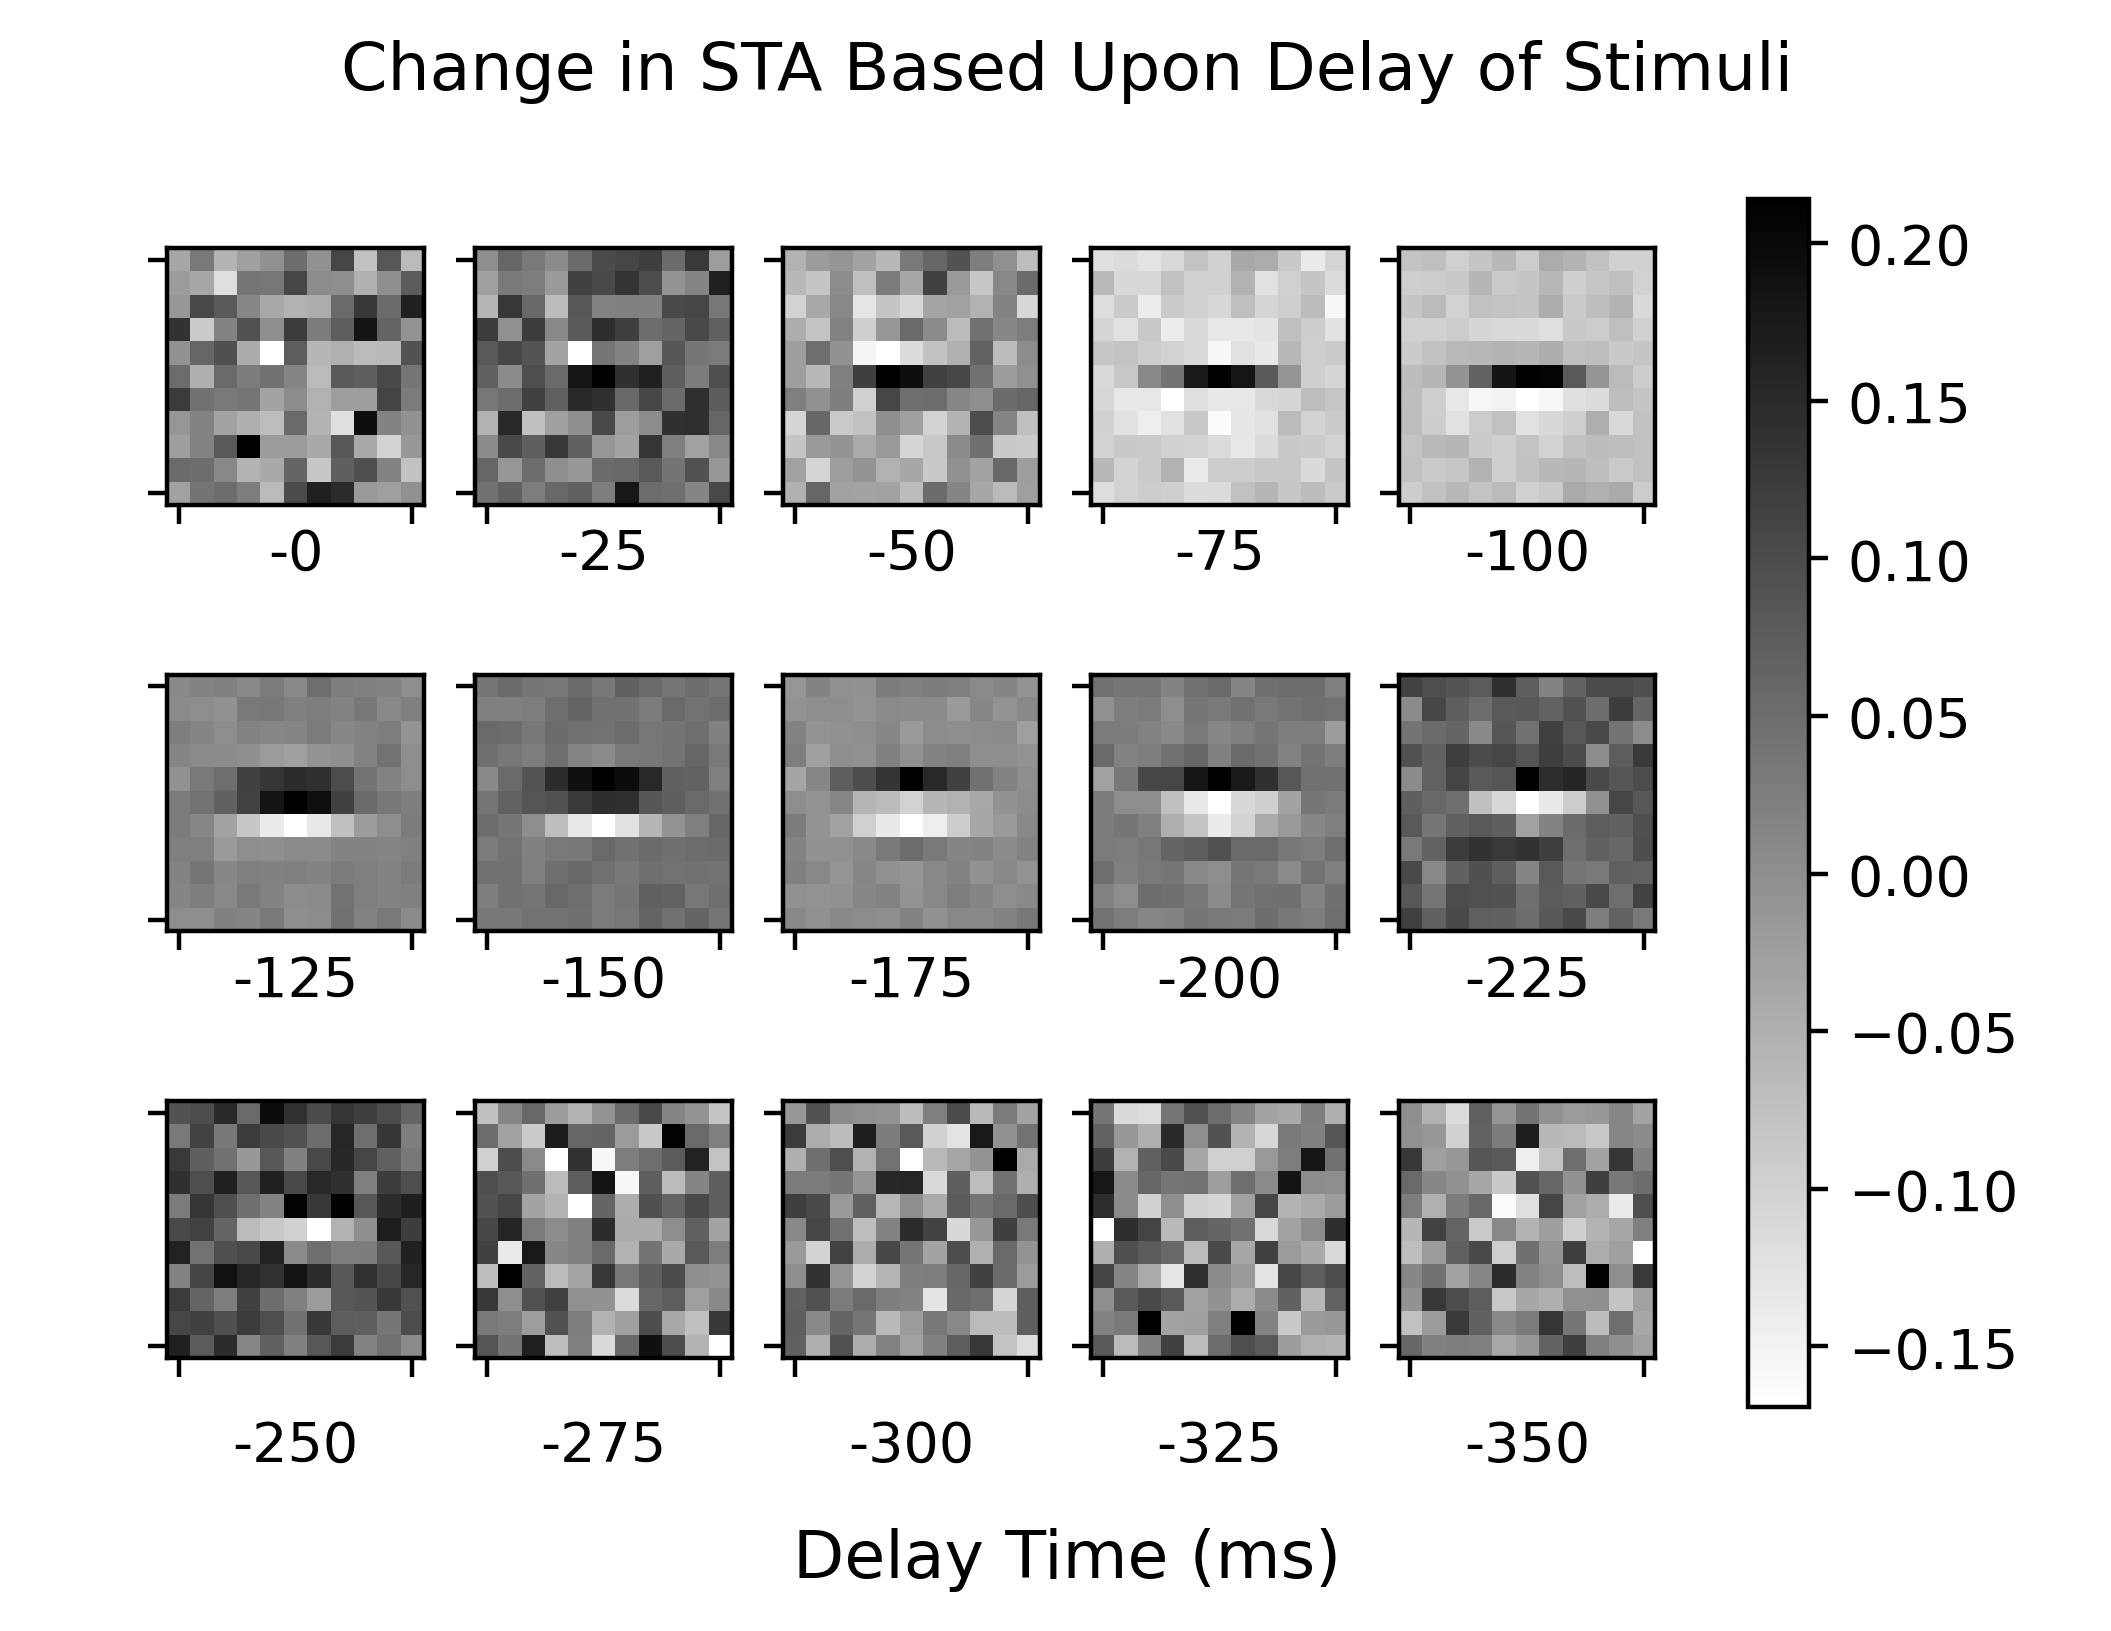

In [15]:
spike_location = np.zeros((int(np.sum(spikeTrain))))
delay_numb = 15
STA = np.zeros((11,11,delay_numb))

#Plotting preparation
fig = plt.figure()
gs = fig.add_gridspec(3, int(delay_numb/3))
ax = gs.subplots(sharex=True, sharey= True)
fig.add_subplot( frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.suptitle('Change in STA Based Upon Delay of Stimuli')
fig.supxlabel('Delay Time (ms)')


for z in range(delay_numb): #delay loop
    delay = 0.025*z*frame_rate # conversion
    delay_title = 25*z
    
    # STA calculation
    for i in range(int(len(spikeTrain))):
        if spikeTrain[i] == 1:
            STA[:,:,z] = STA[:,:,z] + stim[:,:,int(i-delay)]
    STA[:,:,z] = STA[:,:,z]/ np.sum(spikeTrain)
    
    
    #STA plotting
    #ax[z].imshow(STA[:,:,z], interpolation='nearest', cmap='gray')
    if z < 5:
        pos = ax[0,z].imshow(STA[:,:,z], interpolation='nearest', cmap='gray_r')
        ax[0,z].set_yticklabels([])
        ax[0,z].set_xticklabels([])
        ax[0,z].set_xlabel('-{}'.format(delay_title))
    elif z < 10:
        pos = ax[1,z-5].imshow(STA[:,:,z], interpolation='nearest', cmap='gray_r')
        ax[1,z-5].set_yticklabels([])
        ax[1,z-5].set_xticklabels([])
        ax[1,z-5].set_xlabel('-{}'.format(delay_title))
    else:
        pos = ax[2,z-10].imshow(STA[:,:,z], interpolation='nearest', cmap='gray_r')
        ax[2,z-10].set_yticklabels([])
        ax[2,z-10].set_xticklabels([])
        ax[2,z-10].set_xlabel('-{}'.format(delay_title))
    #ax[z].set_title('{}'.format(delay_title))
    #ax[z].set_xlabel('{}'.format(delay_title))
    
fig.colorbar(pos, ax = ax)
plt.show()

The value of delay that gives the greatest clairty and information for the Spike Triggered Average (STA) was a delay of 0.125 seconds, or 125 milliseconds. 

Delays between 150 milliseconds and 200 milliseconds provided similar results to the delay at 100 milliseconds, but the clarity of the results was inferior. Instead of a single, centralized, horizontal band of porximal stimulus surrounded by a region of distal stimulus, the STAs for 150 - 200 millisecond delays have noticeable blur to the horizontal band with a reduced differential between the horizontal line and the surrounding area.

The V1 neuron might have such a dependence on time delay so that it can generate a better average of the centrally detected stimuli instead of misfiring at stimuli that, for a millisecond are centrally located, but as an average is something different.

This data suggests that the V1 neuron reacts to a single, centrally forming, horizontal band of proximal stimulus surrounded by a region of distal stimulus.

The STA approach can fail for stimuli that, when averaged, generate new readings which the neuron finds misleading. If a neuron reacts to a checkerboard, net, or grid pattern, averaging might destroy the resolution of the stimuli that, by itself, the neuron would've reacted to. The averaging fails in general for any stimulus that is complex and non-stationary as, for rotating stimuli, the rotation generates an average stimulus that wouldn't generate a neuronal response, and the resolution of a complex stimulus would decrease by averaging resulting in a similar lack of corresponding action potential.